# Supermarket Sales Analysis 

In [1]:
# Required libraries for analysis.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data 
sales = pd.read_csv(r'C:\Users\Dell\Desktop\Drive\AMOL2\Journey2025\Sambhav\datasets_sambhav\supermarket_sales.csv')
sales.head()

,Unnamed: 0,Invoice ID,Branch,City,Customer_type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
sales.columns

Index(['Unnamed: 0', 'Invoice ID', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1000 non-null   int64  
 1   Invoice ID               1000 non-null   object 
 2   Branch                   1000 non-null   object 
 3   City                     1000 non-null   object 
 4   Customer_type            1000 non-null   object 
 5   Gender                   1000 non-null   object 
 6   Product line             1000 non-null   object 
 7   Unit price               1000 non-null   float64
 8   Quantity                 1000 non-null   int64  
 9   Tax 5%                   1000 non-null   float64
 10  Total                    1000 non-null   float64
 11  Date                     1000 non-null   object 
 12  Time                     1000 non-null   object 
 13  Payment                  1000 non-null   object 
 14  cogs                     

In [5]:
sales.describe()

,Unnamed: 0,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,499.500000,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,288.819436,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,0.000000,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,249.750000,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,499.500000,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,749.250000,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,999.000000,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


## Cleaning and preparation

In [6]:
# Missing value
sales.isnull().sum()

Unnamed: 0                 0
Invoice ID                 0
Branch                     0
City                       0
Customer_type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
# Duplicate records
sales['Invoice ID'].duplicated().any()

np.False_

In [8]:
# drop duplicate records
sales.drop_duplicates(inplace = True)

In [9]:
# convert datatype 
sales['Date'] = pd.to_datetime(sales['Date'])

In [10]:
sales['Time'] = pd.to_datetime(sales['Time'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_18092\721023929.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales['Time'] = pd.to_datetime(sales['Time'])


In [11]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               1000 non-null   int64         
 1   Invoice ID               1000 non-null   object        
 2   Branch                   1000 non-null   object        
 3   City                     1000 non-null   object        
 4   Customer_type            1000 non-null   object        
 5   Gender                   1000 non-null   object        
 6   Product line             1000 non-null   object        
 7   Unit price               1000 non-null   float64       
 8   Quantity                 1000 non-null   int64         
 9   Tax 5%                   1000 non-null   float64       
 10  Total                    1000 non-null   float64       
 11  Date                     1000 non-null   datetime64[ns]
 12  Time                     1000 non-n

In [12]:
# Feature engineering
sales.drop(columns ='Unnamed: 0', axis = 1, inplace = True)

In [13]:
sales['month'] = sales['Date'].dt.month_name()

In [14]:
sales['hour'] = sales['Time'].dt.hour

In [15]:
sales['day_of_the_week'] = sales['Date'].dt.day_name()

In [16]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer_type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

## Exploratory Data analysis (EDA) :

## Most profitable product line and top performing branch

In [17]:
# Total sales by product line
sales.groupby('Product line')['Total'].sum().sort_values(ascending=False)

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64

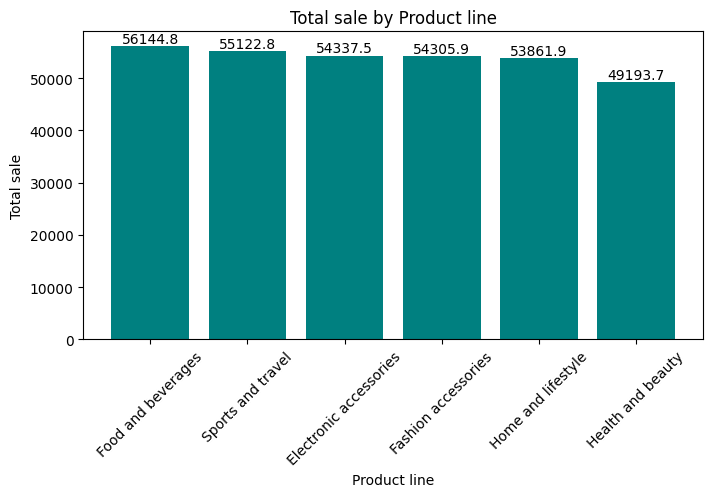

In [18]:
# Total sales by product line 
product = sales.groupby('Product line')['Total'].sum().sort_values(ascending=False)
colors = ['pink','olive','teal','skyblue','magenta','cyan']
fig,ax = plt.subplots(figsize = (8,4))
bars = ax.bar(product.index, product.values,color='teal')
ax.set_xlabel('Product line')
ax.set_ylabel('Total sale')
ax.set_title('Total sale by Product line')
ax.bar_label(bars)
plt.xticks(rotation = 45)
plt.show()

In [19]:
# Total sales by brach
sales.groupby('Branch')['Total'].sum().sort_values(ascending = False)

Branch
C    110568.7065
A    106200.3705
B    106197.6720
Name: Total, dtype: float64

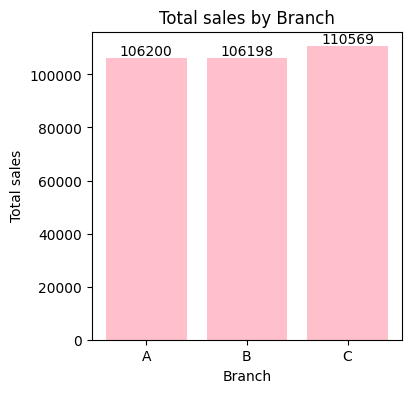

In [20]:
branch =sales.groupby('Branch')['Total'].sum()
fig,ax = plt.subplots(figsize = (4,4))
bars = ax.bar(branch.index, branch.values,color='pink')
ax.set_xlabel('Branch')
ax.set_ylabel('Total sales')
ax.set_title('Total sales by Branch')
ax.bar_label(bars)
plt.show()

## Customer purchasing patterns across customer type and gender

In [21]:
# most sales by customer type
sales.groupby('Customer_type')['Total'].sum()

Customer_type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64

In [22]:
# most sales by gender
sales.groupby('Gender')['Total'].sum()

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64

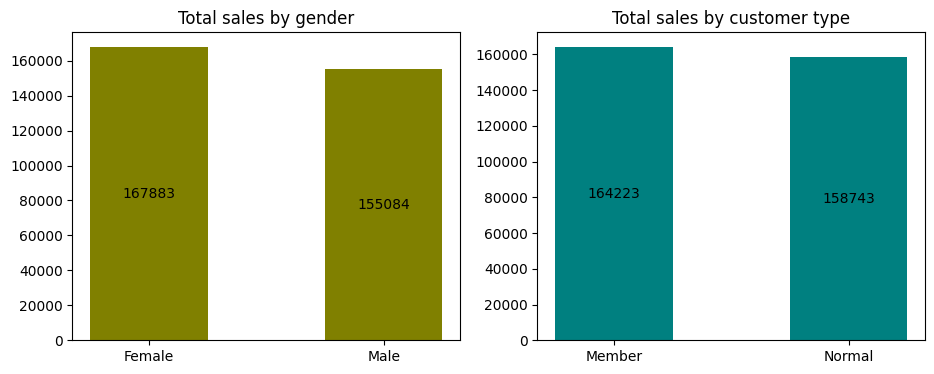

In [23]:
# Total sales by gender and customer type
gender = sales.groupby('Gender')['Total'].sum()
customer=sales.groupby('Customer_type')['Total'].sum()

fig, (ax1,ax2) = plt.subplots(1,2, figsize =(11,4))

bars = ax1.bar(gender.index,gender.values, width = 0.5,  color = 'olive')
bars2 = ax2.bar(customer.index,customer.values, width = 0.5, color = 'teal')

ax1.set_title('Total sales by gender')
ax2.set_title('Total sales by customer type')

ax1.bar_label(bars, label_type='center')
ax2.bar_label(bars2, label_type='center')

plt.show()

## Most Sales and transaction by day of the week

In [24]:
# Peak hours and most transaction by day
sales.groupby('day_of_the_week')['Invoice ID'].count()

day_of_the_week
Friday       139
Monday       125
Saturday     164
Sunday       133
Thursday     138
Tuesday      158
Wednesday    143
Name: Invoice ID, dtype: int64

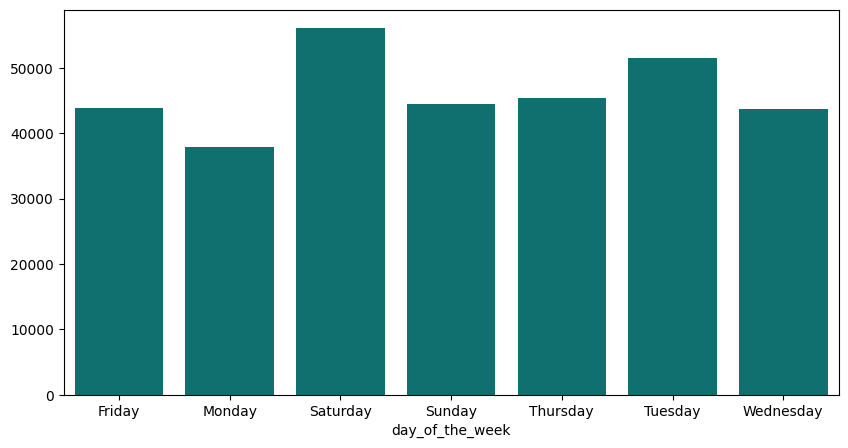

In [25]:
# Total sales by day of the week
day = sales.groupby('day_of_the_week')['Total'].sum()
fig, ax = plt.subplots(figsize = (10,5))
bars = sns.barplot(x = day.index, y = day.values, color = 'teal')
plt.show()

## Most transaction by hours

In [26]:
# total transaction by hour
sales.groupby('hour')['Invoice ID'].count()

hour
10    101
11     90
12     89
13    103
14     83
15    102
16     77
17     74
18     93
19    113
20     75
Name: Invoice ID, dtype: int64

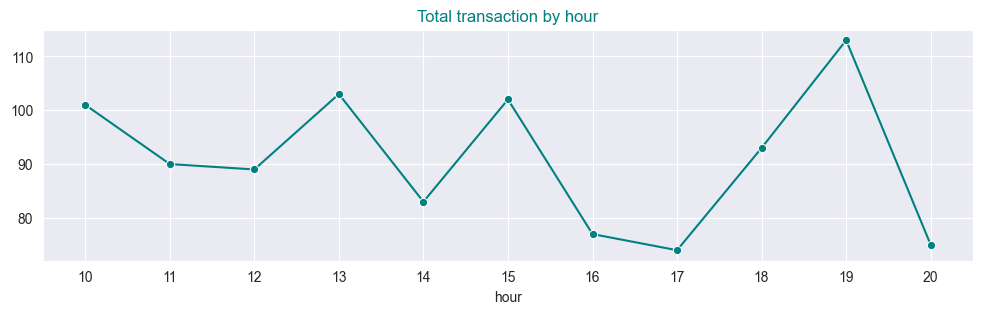

In [27]:
# total transaction by hour
transaction =sales.groupby('hour')['Invoice ID'].count()
sns.set_style("darkgrid")
fig,ax = plt.subplots(figsize = (12,3))
bars = sns.lineplot(x=transaction.index, y=transaction.values , marker = 'o', color='teal')
# ax.set_xlabel('Branch')
# ax.set_ylabel('Total sales')
ax.set_title('Total transaction by hour', color = 'teal')
plt.xticks(transaction.index)
plt.grid(True)


plt.show()

## Most sales by hours

In [28]:
# total sales by hour
sales.groupby('hour')['Total'].sum()

hour
10    31421.4810
11    30377.3295
12    26065.8825
13    34723.2270
14    30828.3990
15    31179.5085
16    25226.3235
17    24445.2180
18    26030.3400
19    39699.5130
20    22969.5270
Name: Total, dtype: float64

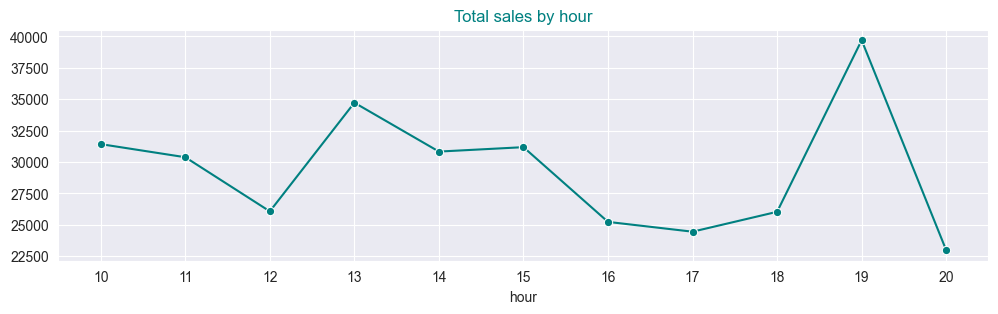

In [29]:
# total sales by hour
hour =sales.groupby('hour')['Total'].sum()
sns.set_style("darkgrid")
fig,ax = plt.subplots(figsize = (12,3))
bars = sns.lineplot(x=hour.index, y=hour.values , marker = 'o', color='teal')
# ax.set_xlabel('Branch')
# ax.set_ylabel('Total sales')
ax.set_title('Total sales by hour', color = 'teal')
plt.xticks(hour.index)
plt.grid(True)

plt.show()